## Problem Definition
Predict the auto insurance premium amount using a suitable machine learning model.
The goal is to learn the relationship between a person’s age, their accident history in the past two years, and the premium amount charged by the insurer.

## Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('auto_insurance_data.csv')

In [3]:
df.head()

,age,caused_an_accidient_in_past_two_years,annual_premium_usd
0,35.60,no,1600.07
1,62.68,no,1331.82
2,52.40,yes,1964.64
3,46.14,yes,2057.00
4,25.33,yes,2292.35


## Data Exploration & Preprocessing

In [4]:
df.describe()

,age,annual_premium_usd
count,1000.000000,1000.000000
mean,41.042180,1805.226000
std,13.730356,282.617562
min,18.220000,1284.250000
25%,29.090000,1558.860000
50%,41.350000,1774.675000
75%,52.987500,2038.710000
max,64.990000,2383.870000


In [5]:
df['caused_an_accidient_in_past_two_years'].value_counts()

caused_an_accidient_in_past_two_years
no     570
yes    430
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

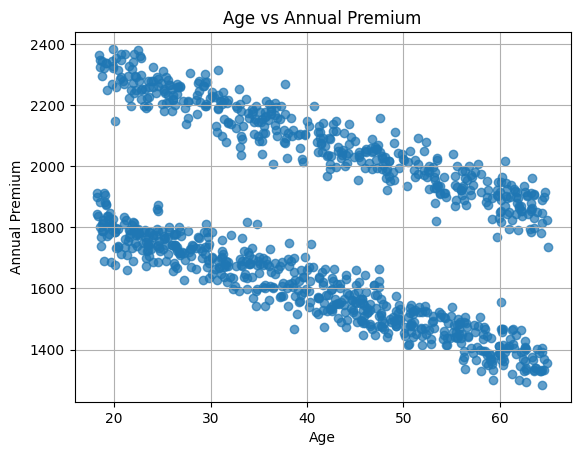

In [7]:
plt.scatter(df['age'], df['annual_premium_usd'], alpha=0.7)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.grid(True)
plt.show()

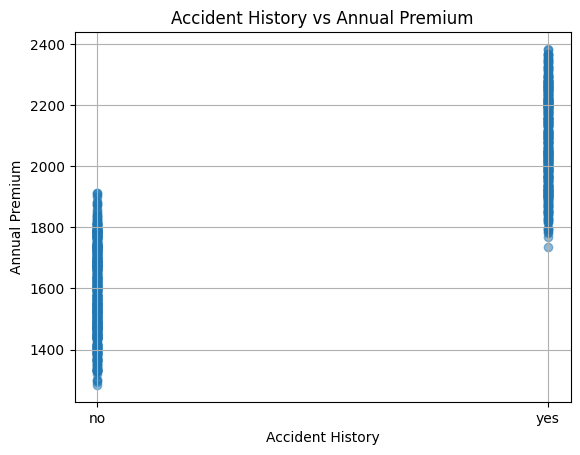

In [8]:
plt.scatter(df['caused_an_accidient_in_past_two_years'], df['annual_premium_usd'], alpha=0.5)
plt.title('Accident History vs Annual Premium')
plt.xlabel('Accident History')
plt.ylabel('Annual Premium')
plt.grid(True)
plt.show()

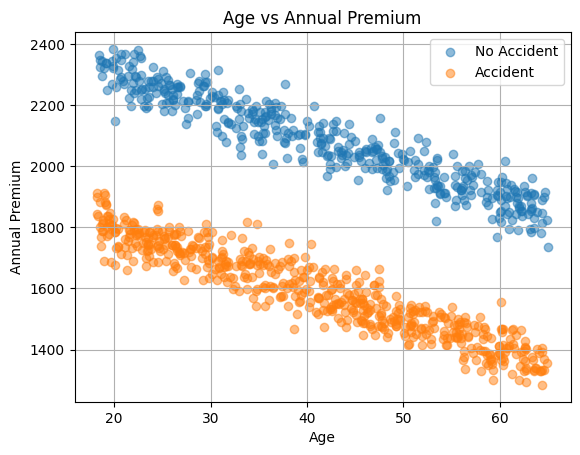

In [9]:
has_accident_history_df = df[df['caused_an_accidient_in_past_two_years'] == "yes"]
no_accident_history_df = df[df['caused_an_accidient_in_past_two_years'] == "no"]
plt.scatter(has_accident_history_df['age'], has_accident_history_df['annual_premium_usd'], alpha=0.5, label='Has Accident History')
plt.scatter(no_accident_history_df['age'], no_accident_history_df['annual_premium_usd'], alpha=0.5, label='No Accident History')
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.legend(['No Accident', 'Accident'])
plt.grid(True)
plt.show()

In [10]:
df['caused_an_accidient_in_past_two_years'] = df['caused_an_accidient_in_past_two_years'].map({'yes': 1, 'no': 0})

In [11]:
df.head()

,age,caused_an_accidient_in_past_two_years,annual_premium_usd
0,35.60,0,1600.07
1,62.68,0,1331.82
2,52.40,1,1964.64
3,46.14,1,2057.00
4,25.33,1,2292.35


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['age', 'caused_an_accidient_in_past_two_years']]
y = df['annual_premium_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 2)
y_train shape: (800,)
X_test shape: (200, 2)
y_test shape: (200,)


## Model Selection & Training

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.predict([[20, 0]])

array([1798.90049086])

## Model Interpretation
$y = w_{1}x_{1} + w_{2}x_{2} + b$  

$ \text{annual premium} = w_1.\text{age} + w_2.\text{accident history} + b$

$w1$ -> co-efficient of age  
$w2$ -> co-efficient of accident history
$b$ -> bias

In [17]:
model.coef_

array([ -9.95088805, 499.18950284])

In [18]:
model.intercept_

np.float64(1997.9182518985917)

In [19]:
def predict_annual_premium(age, accident_history):
    return -9.95088805*age + 499.18950284*accident_history + 1997.9182518985917

The base price of the insurance premium is around 2000\$  
As the driver gets older the premium decreases by around 10\$  
If a driver has been in an accident, an additional premium of around 500\$ will be applied for upto 2 years


In [20]:
predict_annual_premium(20, 1)

2298.0899937385916

## Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
rmse_train = mean_squared_error(y_train, model.predict(X_train))**0.5
rmse_test = mean_squared_error(y_test, model.predict(X_test))**0.5

print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")

RMSE for training set: 48.60293078863662
RMSE for test set: 50.07256935886319


## Model Deployment
The trained model can now be deployed through a **Streamlit application** to provide an interactive interface for auto insurance premium prediction.  
In the app, a user can input their age and accident history (yes/no), and the underlying function will compute the predicted premium amount based on our trained model.  

Refer to `03_auto_insurance_prediction/app.py` for the Streamlit application code.
